 # **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Hesus Garcia Cobos
*   MATRÍCULA: A01129778

---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


<div class="alert alert-block alert-warning" style="font-size: 16px;">

1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje de valores faltantes por columna.

</div>

In [1]:
import subprocess
import sys

def install(package):
    try:
        __import__(package)
        print(f"{package} ya está instalado.")
    except ImportError:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--quiet"])

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in packages:
    install(package)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pandas ya está instalado.
numpy ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.


In [2]:
plt.style.use('ggplot')

In [3]:
air_df = pd.read_csv("data\LaqnData.csv")

# Estructura y contenido del dataframe
print(f"Forma: {air_df.shape[0]:,} filas y {air_df.shape[1]} columnas")
print(f"Columnas:")
for col in air_df.columns:
    print(col)
print(f"\n Primeros Registros:")
display(air_df.head())
print(f"Ultimos Registros:")
display(air_df.tail())
print(f"Tipos de datos:\n{air_df.dtypes}")

faltantes_df = (
    air_df.isnull()
    .sum() 
    .to_frame('null')
)

faltantes_df['null (%)'] = (
    faltantes_df['null'] / len(air_df) * 100
).round(2)


display(faltantes_df)

Forma: 43,800 filas y 6 columnas
Columnas:
Site
Species
ReadingDateTime
Value
Units
Provisional or Ratified

 Primeros Registros:


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


Ultimos Registros:


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


Tipos de datos:
Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object


,null,null (%)
Site,0,0.00
Species,0,0.00
ReadingDateTime,0,0.00
Value,3230,7.37
Units,0,0.00
Provisional or Ratified,0,0.00


<div class="alert alert-block alert-warning" style="font-size: 16px;">
2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [4]:
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

### 📊 Análisis:  

1️⃣ **¿Cuántas mediciones se hicieron?**  
👉 **8760 mediciones** en total, lo cual corresponde al número de valores únicos en `ReadingDateTime`. ¡ 📆🕵️‍♀️  

2️⃣ **¿Cuántos contaminantes del aire (`Species`) se analizaron?**  
👉 **5 contaminantes analizados** en `Species`. 🌬️💨  

3️⃣ **¿Qué columnas no agregan valor informativo?**  
👉 `Provisional or Ratified` tiene un solo valor único (**nunique = 1**) al igual que `Site`, por lo que no aporta información útil.

4️⃣ **¿Qué pasa con la columna `Units`?**  
👉 Aunque tiene **3 valores únicos**, estos probablemente sean categorías repetitivas sin gran valor (por ejemplo, unidades constantes), se inspeccionará a detalle.  


In [5]:
air_df['Units'].value_counts()

Units
ug m-3           26280
ug m-3 as NO2     8760
ug/m3             8760
Name: count, dtype: int64

In [6]:
air_df = (
    air_df[air_df.nunique()[air_df.nunique() > 1].index]
    .drop(columns=["Units"])
)


In [7]:
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


<div class="alert alert-block alert-warning" style="font-size: 16px;">

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.


</div>

In [8]:
air_df['Species'].value_counts()

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64

In [9]:
air_df.groupby(['Species'])['Value'].apply(lambda x: x.isnull().sum())

Species
NO        100
NO2       100
NOX       100
PM10      103
PM2.5    2827
Name: Value, dtype: int64

In [10]:
air_df['Species']
air_df[air_df['Species'] == 'PM10']['Value'].isnull().sum()

np.int64(103)

El análisis muestra que todas las especies (`NO`, `NO2`, `NOX`, `PM10`, `PM2.5`) tienen 8,760 mediciones totales, pero presentan diferentes cantidades de valores nulos. Es decir no todosa los 8760 registros son valores usables

<div class="alert alert-block alert-warning" style="font-size: 16px;">

4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

</div>

In [11]:
(air_df.groupby('Species')['Value']
 .mean()
 .sort_values(ascending=False)
 .round(2)
)

Species
NOX      61.08
NO2      38.01
PM10     22.55
NO       15.05
PM2.5    15.00
Name: Value, dtype: float64

<div class="alert alert-block alert-warning" style="font-size: 16px;">

5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

</div>

In [12]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


<div class="alert alert-block alert-warning" style="font-size: 16px;">


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?


</div>

In [13]:
pvt_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
NO,8660.0,15.05,26.68,-2.0,3.1,7.1,15.5,401.8
NO2,8660.0,38.01,18.58,2.8,23.8,35.3,49.9,120.2
NOX,8660.0,61.08,54.58,1.0,30.3,46.9,73.8,734.3
PM10,8657.0,22.55,15.34,-5.6,13.9,19.5,27.3,633.1
PM2.5,5933.0,15.00,13.56,-8.0,7.0,11.0,18.0,128.0



1. **¿Cuál es el mayor valor de NO2 registrado? ¿A qué día pertenece?**
   - El mayor valor de NO2 registrado es **120.2**.DataFrame original con un filtro como:


In [14]:
pvt_df[pvt_df['NO2'] == 120.2]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
24/01/2017 19:00,148.60001,120.2,348.10001,44.4,42.0


2. **¿Cuál es el menor valor de PM10 registrado? ¿A qué día pertenece?**
   - El menor valor de PM10 registrado es **-5.6**.

In [15]:
pvt_df[pvt_df['PM10'] == -5.6]

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
12/09/2017 23:00,0.1,7.0,7.1,-5.6,NaN


3. **¿Cuál es la mediana del NO? ¿Cómo se interpreta?**
   - La mediana del NO es **7.1**. La mediana representa el valor central cuando los datos están ordenados. Esto indica que el 50% de los valores de NO están por debajo de 7.1 y el otro 50% están por encima.

4. **¿Cuál es el primer cuartil de PM2.5? ¿Qué significa?**
   - El primer cuartil de PM2.5 es **7.0**.El primer cuartil representa el valor por debajo del cual se encuentra el 25% de los datos. Esto indica que el 25% de los valores de PM2.5 son menores o iguales a 7.0.

<div class="alert alert-block alert-warning" style="font-size: 16px;">


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?


</div>

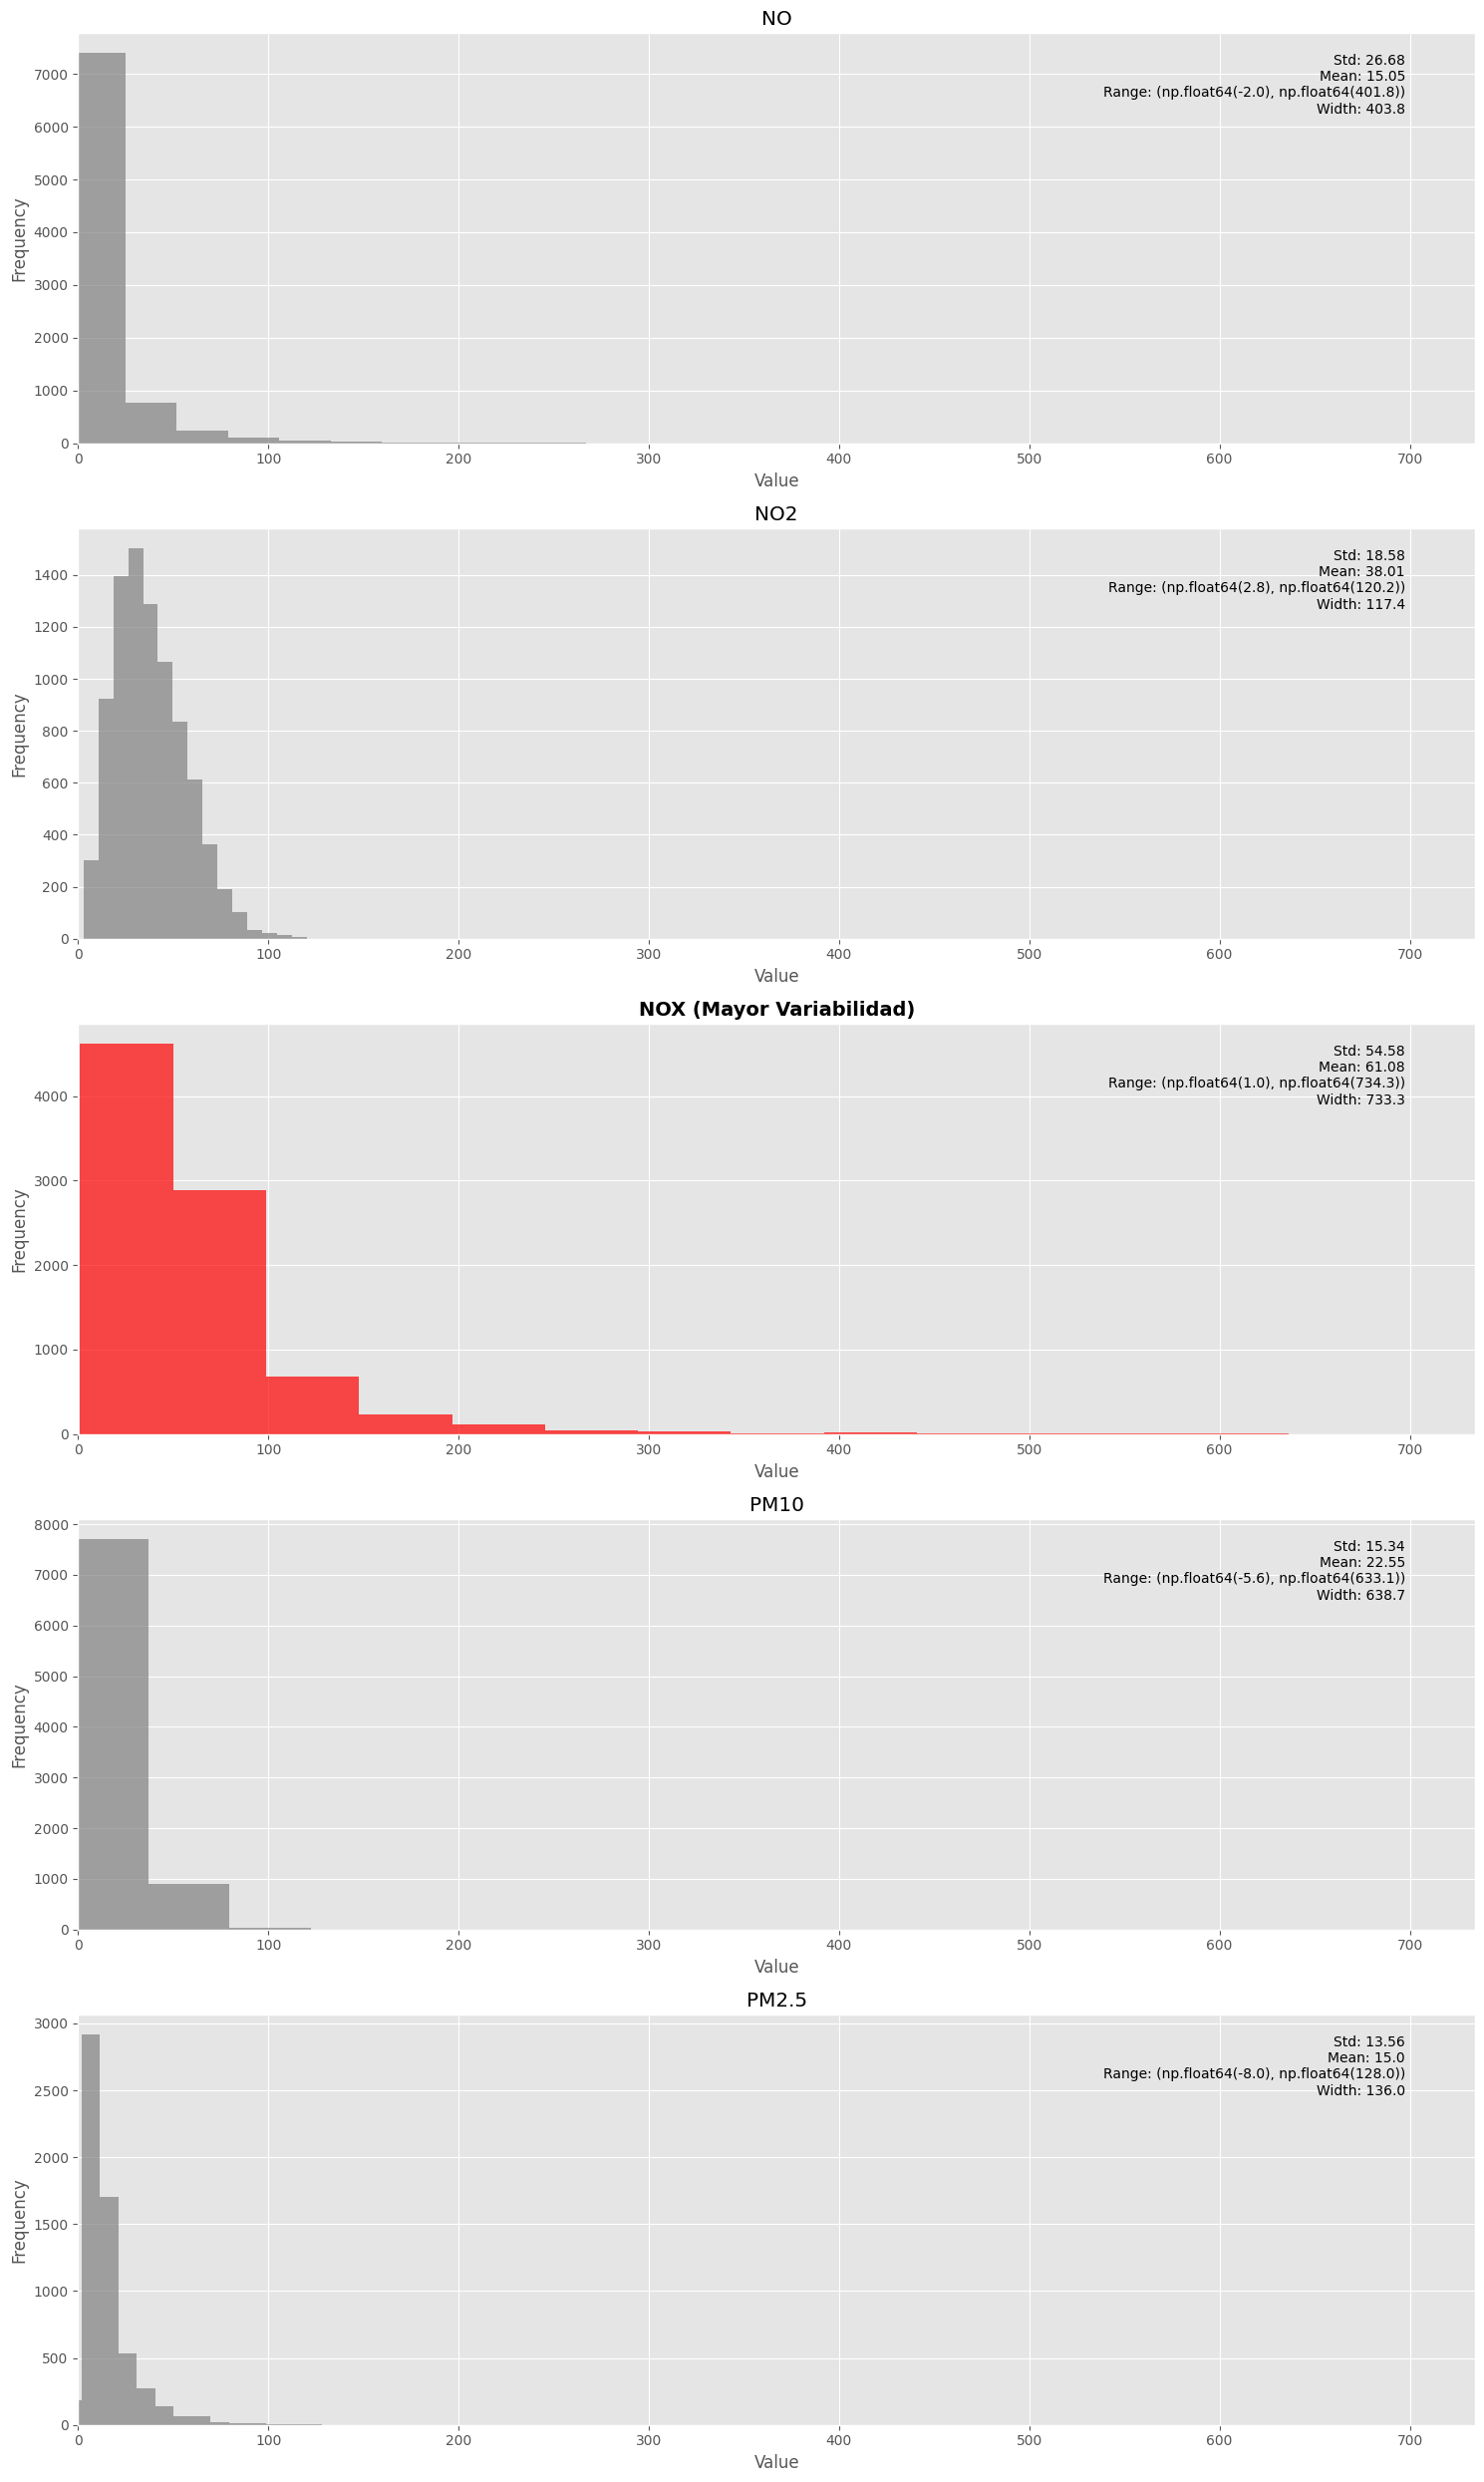

In [16]:
import numpy as np
import matplotlib.pyplot as plt

max_variability = 0
max_variability_col = ''

for col in pvt_df.columns:
    data = pvt_df[col].dropna()
    min_value = data.min().round(2)
    max_value_col = data.max().round(2)
    range_width = (max_value_col - min_value).round(2)
    
    if range_width > max_variability:
        max_variability = range_width
        max_variability_col = col

colors = ['red' if col == max_variability_col else 'gray' for col in pvt_df.columns]

plt.figure(figsize=(15, 25))
max_value = pvt_df.max().max()

for i, (col, color) in enumerate(zip(pvt_df.columns, colors), 1):
    plt.subplot(len(pvt_df.columns), 1, i)
    data = pvt_df[col].dropna()
    bins = int(np.ceil(1 + np.log2(len(data))))
    std_dev = data.std().round(2)
    mean_value = data.mean().round(2)
    min_value = data.min().round(2)
    max_value_col = data.max().round(2)
    range_value = (min_value, max_value_col)
    range_width = (max_value_col - min_value).round(2)

    data.plot(kind='hist', bins=bins, title=col, color=color, alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.xlim(0, max_value)
    plt.text(0.95, 0.95, f'Std: {std_dev}\nMean: {mean_value}\nRange: {range_value}\nWidth: {range_width}', 
             ha='right', va='top', transform=plt.gca().transAxes)
    
    if col == max_variability_col:
        plt.title(f'{col} (Mayor Variabilidad)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning" style="font-size: 16px;">

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

</div>

In [17]:
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)  # Divide 'ReadingDateTime' en fecha y hora, creando un nuevo DataFrame.
datetime_df.columns = ['Date', 'Time']  # Asigna nombres a las nuevas columnas: 'Date' y 'Time'.
datetime_df  # Muestra el DataFrame dividido. 📆⏰

date_df = datetime_df.Date.str.split('/', expand=True)  # Divide la columna 'Date' en día, mes y año.
date_df.columns = ['Day', 'Month', 'Year']  # Renombra las columnas para mayor claridad.
date_df  # Muestra el DataFrame de fecha dividido. 📅✨

air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])  
# Une las nuevas columnas al DataFrame original y elimina 'ReadingDateTime' y 'Year' porque ya no son necesarias.

air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])  # Establece un índice jerárquico con estas columnas clave.
air_df  # Dataset procesado y listo para análisis avanzado. 🔥🎯


Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

<div class="alert alert-block alert-warning" style="font-size: 16px;">

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

</div>

In [18]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]


**Tabla 1 (Antes):**
- Formato largo
- 43800 filas x 1 columna
- Una medición por fila

**Tabla 2 (Después de unstack):**
- Formato ancho 
- 8760 filas x 5 columnas
- Todas las mediciones en la misma fila

`unstack()` convirtió los datos de formato largo a ancho, haciendo que cada tipo de medición (NO, NO2, etc.) tenga su propia columna 🔄

<div class="alert alert-block alert-warning" style="font-size: 16px;">

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

</div>

Primero verificaremos que hace cada uno:
| Función | ¿Qué hace? |
|---------|------------|
| 🔄 melt() | Toma las columnas y las convierte en filas. Es como "derretir" la tabla para hacerla más larga y delgada |
| 📊 pivot() | Hace lo contrario que melt(): toma filas y las convierte en columnas. Como reorganizar los datos en una tabla más ancha |
| 📚 stack() | Similar a melt(), pero especializado en trabajar con índices más complejos. Convierte columnas en filas de manera ordenada |
| 🔀 unstack() | El opuesto de stack(): toma los datos organizados en filas y los convierte en columnas, ideal para datos con varios niveles |


### Diferencias y similitudes entre `melt()/pivot()` y `stack()/unstack()`:

| Característica         | `melt()` / `pivot()`                      | `stack()` / `unstack()`                |
|------------------------|------------------------------------------|----------------------------------------|
| **¿Qué transforma?**   | Trabajan con **columnas** y **filas** del DataFrame (estructura simple). | Trabajan principalmente con **índices** y **niveles jerárquicos** (estructuras más complejas). |
| **Uso común**          | Ideal para **reformatear datos planos** (de largo a ancho y viceversa). | Ideal para **manipular índices jerárquicos** o datos multi-indexados. |
| **Entrada esperada**   | Un DataFrame regular (sin índices jerárquicos). | Un DataFrame con índices múltiples (MultiIndex). |
| **Salida**             | Devuelve un DataFrame reorganizado, pero no cambia el índice. | Devuelve un DataFrame con el índice reorganizado (más o menos niveles según la operación). |
| **Contrapartes**       | `melt()` tiene a `pivot()` como opuesto directo. | `stack()` tiene a `unstack()` como opuesto directo. |
| **Flexibilidad**       | Funciona mejor con datos tabulares simples. | Es más poderoso cuando los datos tienen jerarquías (índices y niveles). |

---

### ¿Cuál es la contraparte más adecuada para `melt()` entre `stack()` y `unstack()`?

La **contraparte más adecuada para `melt()` sería `stack()`**. Ambas realizan funciones conceptualmente similares, ya que:

- **Ambas convierten columnas en filas**:
  - `melt()` toma columnas regulares y las convierte en filas.
  - `stack()` toma columnas en índices jerárquicos y las apila en filas.

Por lo tanto, si el objetivo es "derretir" o transformar datos de un formato ancho a uno largo, `stack()` es la herramienta más parecida a `melt()`.

---

### ¿Por qué elegir `stack()` como la contraparte de `melt()`?

1. **Similitud en propósito**:
   - Ambas funciones simplifican datos al transformar columnas en filas.

2. **Flexibilidad**:
   - Aunque `melt()` funciona en datos simples, `stack()` es más robusto porque puede trabajar con índices jerárquicos.

3. **Consistencia en estructura**:
   - `melt()` convierte datos anchos a largos, y `stack()` hace algo equivalente pero considerando la estructura jerárquica del índice.


# Nota al Revisor de la tarea

![Buen día](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExcjg5MTdwbTJiNjB3cm5xbXptenBlaGJjeGYzNGtlNTduajU3MWY1NiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/2ZvQhiW2dup20/giphy.gif)

---

¡Hola! Espero que tengas un excelente día. Aprecio mucho tu tiempo y dedicación al revisar mi tarea. Que la pases muy bien y cuando gustes, mándame un mensaje y platicamos. 😊
P.S. te escribí un haiku, gracias por tu labor.

Lee con cuidado <br>
Guiando entre números <br>
Luz del saber brilla ⭐